In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/campusx-official/placement-project-logistic-regression/main/placement.csv")

In [ ]:
df.head(5)

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


Our aim is to use the above df to find out whether a candidate is placed or not placed given cgpa and iq

# Steps
# Preprocessing(Missing/Outlier values)+EDA(Data Visualisation to prepare the model for pattern prediction)+Feature Selection(Which all cols to be used)
#Extract input and output cols
#Scale the values(Bringing i/p cols in a defined range)
#Train test split
(imagine you build a model for this problem and found a pattern that candidates with cgpa between (8,10) are likely to get placed
. This model will hold good for the data that we have (the data that was used for training the model But suppose we bring a new dataset altogether that the model has not seen before. There are chances that model will not perform well. This is the draw backs of In -Sample data set). To prevent this we will exclude some dataset from the model and use this excluded dataset to test the model's accuracy.)
#Evaluate the model/model selection

#Deploy the model

In [ ]:
#Preprocessing
#1. Checking for missing values
df.isnull().sum()

Unnamed: 0    0
cgpa          0
iq            0
placement     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [ ]:
df=df.iloc[:,1:]

In [ ]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
import matplotlib.pyplot as plt


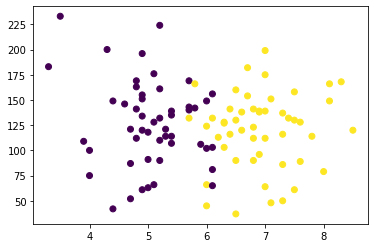

In [ ]:
plt.scatter(df['cgpa'],df[ 'iq'], c=df['placement'])

The above graph shows the two classes (placed in yellow and not placed in blue ) are almost linearly separable and hence we will use a Logistic Refgression here

In [ ]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.1)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
x_train=scaler.fit_transform(x_train) 

In [ ]:
x_test=scaler.fit_transform(x_test) 

In [ ]:
x_test

array([[-0.98125671,  0.75098632],
       [ 0.50549588, -0.52569042],
       [-1.05559433,  0.25032877],
       [-1.27860722, -1.72726853],
       [-0.08920516, -0.2252959 ],
       [-0.31221804,  1.45190688],
       [ 1.24887217,  0.07509863],
       [ 1.76923557,  0.2252959 ],
       [ 0.87718402, -1.52700551],
       [-0.68390619,  1.25164386]])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


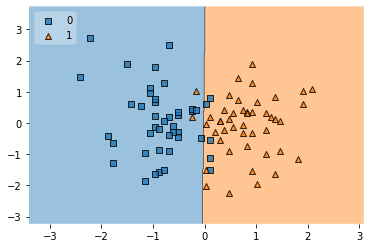

In [ ]:
plot_decision_regions(x_train, y_train.values, clf=model, legend=2)

In [ ]:
from sklearn.metrics import accuracy_score, mean_absolute_error


In [ ]:
accuracy_score(y_test, y_pred)

1.0

In [ ]:
mean_absolute_error(y_test, y_pred)

0.0

In [ ]:
for x in zip(y_pred,y_test):
  print(x)

(0, 0)
(1, 1)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(1, 1)
(1, 1)
(1, 1)
(0, 0)
